In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import pairwise
from sklearn.linear_model import LinearRegression

In [2]:
rand = np.random.randint(0,5,5)
rand

array([2, 3, 2, 3, 4])

In [3]:
n = rand.shape[0]
[sum(rand[i:i+2]) for i in range(n -1)]

[5, 5, 5, 7]

In [5]:
def count_boxes(data:np.ndarray) -> int:
    return sum(1 for item in data if item)

def box_counting_1d(data:np.ndarray, threshold: float) -> float:
    assert len(data.shape) == 1
    L = data.shape[0]
    l = 1
    x = []
    y = []
    for l in range(1, L + 1):
        scalled_array = np.fromiter((np.mean(data[i:i+l]) for i in range(L - l + 1)), dtype=float)
        n_lambda = count_boxes(scalled_array >= threshold)
        x.append(np.log(n_lambda))
        y.append(np.log(L/l))
    return x,y

def beta_sym(n:int, zero_prob: float):
    x = []
    y = []
    old_array = np.ones(1)
    n_items = 1
    for i in range(n):
        n_items *= 2
        new_array = np.zeros(n_items)
        for i in range(n_items):
            idx = i // 2
            mult_factor = 1 if np.random.ranf() > zero_prob else 0
            new_array[i] = old_array[idx]*mult_factor
        n_lambda = count_boxes(new_array == 1)
        x.append(np.log(n_lambda))
        y.append(np.log(n_items))
        old_array = new_array
    return x, y
        

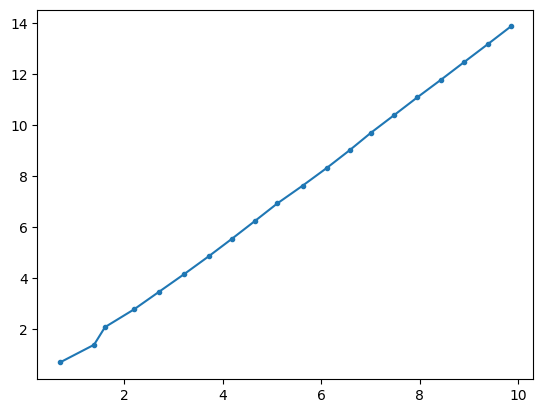

In [15]:
x, y = beta_sym(20, 0.2)
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
ax.plot(x,y, marker=".")

In [16]:
model = LinearRegression()
model.fit(np.array(x).reshape((-1,1)), np.array(y).reshape((-1,1)))

LinearRegression()

In [17]:
model.coef_, model.intercept_

(array([[1.44738733]]), array([-0.4537547]))

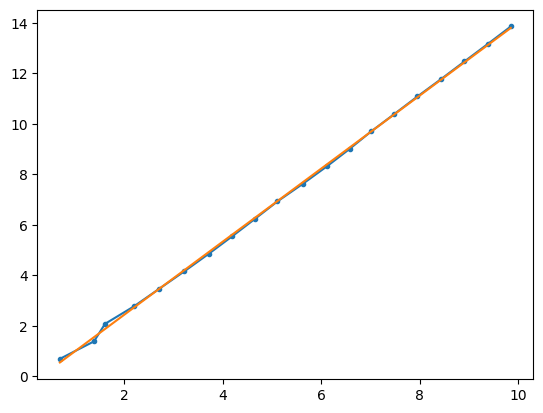

In [18]:
fx = lambda x: x*model.coef_[0] + model.intercept_[0]
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
ax.plot(x,y, marker=".")
ax.plot((x[0], x[-1]), (fx(x[0]), fx(x[-1])))